In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/home/lli-ms/caffeBVLCplus/'
pretrained_model_root = '/home/lli-ms/caffeBVLCplus/'

import sys
caffePython = pretrained_model_root + 'python'
if caffePython not in sys.path:
    sys.path.insert(0, caffePython)
import caffe
import os

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
caffe.set_mode_cpu()

test_file = '../data_list/val_list.txt'
train_file = '../data_list/train_list.txt'
def readFile(fName):
    text_file = open(fName, "r")
    lines = text_file.read().split('\n')
    text_file.close()
    imList = []
    ratingList = []
    for l in lines:
        if len(l) > 2:
            l_split = l.split('.jpg ')
            #print l_split
            imList.append(l_split[0]+'.jpg')
            ratingList.append(float(l_split[1]))
    return imList,ratingList

testIm, testRating = readFile(test_file)
trainIm, trainRating = readFile(train_file)
imPath = testIm[10]
#imPath = caffe_root +'examples/images/fish-bike.jpg'
#lowest
#imPath = '/home/lli-ms/attractiveness_datamining/MIT2kFaceDataset/2kfaces/Google_1_Albert Makowski_6_oval.jpg'
#highest
imPath = '/home/lli-ms/attractiveness_datamining/MIT2kFaceDataset/2kfaces/Google_1_Margaret Wilkerson_3_oval.jpg'

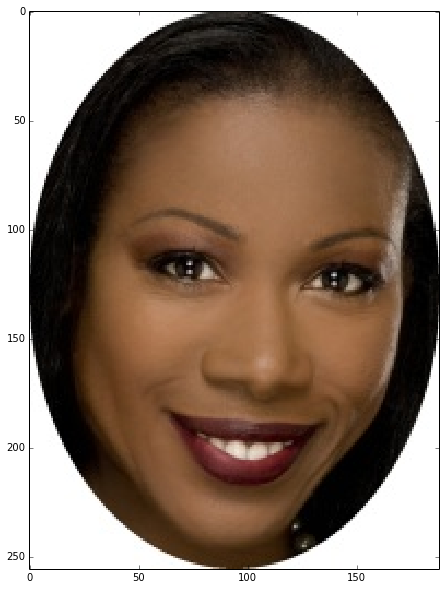

In [5]:
de_layers = ["conv1_1t","conv1_2t","conv2_1t","conv2_2t","conv3_1t","conv3_2t","conv3_3t"\
            ,"conv4_1t","conv4_2t","conv4_3t","conv5_1t","conv5_2t"]
co_layers = ["conv1_1","conv1_2","conv2_1","conv2_2","conv3_1","conv3_2","conv3_3"\
            ,"conv4_1","conv4_2","conv4_3","conv5_1","conv5_2"]
layerNum_list = ['1_1','1_2','2_1','2_2','3_1','3_2','3_3','4_1','4_2','4_3','5_1','5_2']
PRETRAINED_FILE ='/home/lli-ms/caffe/'+ 'models/vgg16_attr/snapshots/first_train_iter_2000.caffemodel'
#'models/VGG16/VGG_ILSVRC_16_layers.caffemodel'
#'models/vgg16_attr/snapshots/first_train_iter_2000.caffemodel'

import matplotlib.image as mpimg
im_orig = mpimg.imread(imPath)
plt.imshow(im_orig)
rec_size1 = [3,4,8,10,18,22,26,42,50,58,90,106]
rec_size = dict(zip(co_layers, rec_size1))
topfeaNum = 9
import math
axNum = int(math.sqrt(topfeaNum))
end_layer = 'fc_out'
saveFigPath = '../neuralNet/VGG16/filter_visual/'+'highest/'
if not os.path.exists(saveFigPath):
    os.makedirs(saveFigPath)

def crop_image(img,img2,tol,wind_size):
    s = img.shape[0]
    inx = []
    iny = []
    for i in range(s):
        for j in range(s):
            if img[i,j,:].tolist()!= tol:
                inx.append(i)
                iny.append(j)
    mid_x = int((min(inx)+max(inx))/2.0)
    mid_y = int((min(iny)+max(iny))/2.0)
    x_min = max(0,mid_x-math.ceil(wind_size/2.0))
    x_max = min(s-1,mid_x+math.floor(wind_size/2.0))
    if x_min == 0 and (x_max - x_min)< wind_size:
        x_max  = x_min +wind_size
    if x_max == s-1 and (x_max - x_min)< wind_size:
        x_min = x_max -wind_size
    y_min = max(0,mid_y-math.ceil(wind_size/2.0))
    y_max = min(s-1,mid_y+math.floor(wind_size/2.0))
    if y_min == 0 and (y_max - y_min)< wind_size:
        y_max  = y_min +wind_size
    if y_max == s-1 and (y_max - y_min)< wind_size:
        y_min = y_max -wind_size
    return img[x_min:x_max,y_min:y_max,:],img2[x_min:x_max,y_min:y_max,:]

from collections import Counter
def find_color_gray(img):
    img_as_list = img.tolist()
    words_to_count = [str(word) for entries in img_as_list for word in entries ]
    c = Counter(words_to_count)
    str_common = c.most_common(1)[0][0]
    strs = str_common.replace('[','').replace(']','')
    lists = map(int, strs.split(','))
    return lists


*********************NOW PROCESSING LAYER 5_2**************************************
(512, 14, 14)
index before sort: [[180  13   0]
 [357  13   0]
 [317  12  13]
 [250  11   1]
 [484  13  13]
 [ 55  13  13]
 [191  13  13]
 [424  13  13]
 [272  12  13]]
top features:  [ 18117.3125      18356.58007812  18370.26171875  18558.73242188
  18636.41796875  19762.859375    20061.30664062  20920.93164062
  26669.88867188]
(9,)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(106, 106, 3)
(106, 106, 3)
(106, 106, 3)
(106, 106, 3)
(106, 106, 3)
(106, 106, 3)
(106, 106, 3)
(106, 106, 3)
(106, 106, 3)
*********************DONE PROCESSING LAYER 5_2**************************************


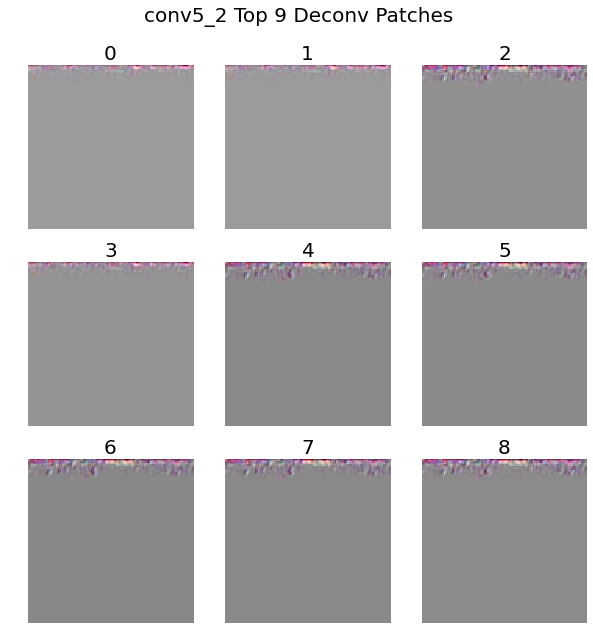

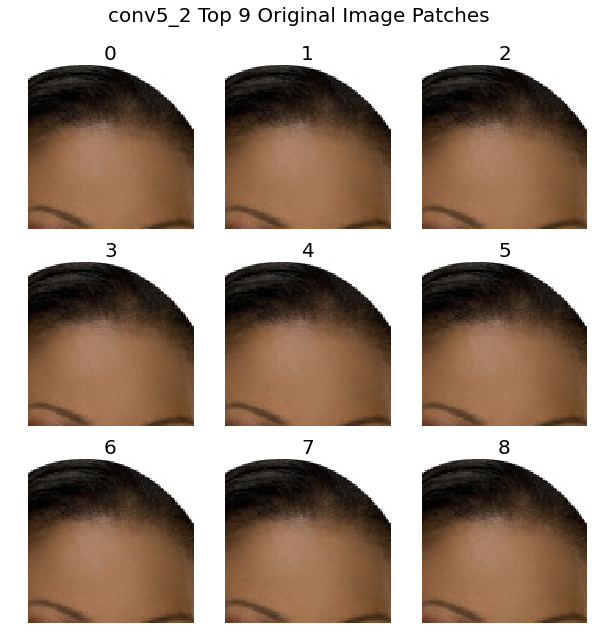

In [8]:
layer_num = '1_1'
topfeaNum = 9
for layer_num in [layerNum_list[-1]]:
    print '*********************NOW PROCESSING LAYER '+layer_num+'**************************************'
    MODEL_FILE = '../neuralNet/VGG16/attr_deconv_deploy'+layer_num+'.prototxt'
    net = caffe.Net(MODEL_FILE,
                    PRETRAINED_FILE,
                    caffe.TEST)

    # input preprocessing: 'data' is the name of the input blob == net.inputs[0]
    transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
    transformer.set_transpose('data', (2,0,1))
    transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
    transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
    transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB
    net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(imPath))

    deconv_layer = 'conv'+layer_num+'t'
    copy_end = de_layers.index(deconv_layer)
    conv_layer = co_layers[copy_end]
    for i in range(copy_end+1):
        net.params[de_layers[i]][0].data[...] = net.params[co_layers[i]][0].data.transpose(0,1,3,2)

    out = net.forward()
    o = net.blobs['conv1_1t'].data[0].copy()
    o -= o.min()
    o /= o.max()
    o *= 255
    o = np.rollaxis(o, 0, 3).astype(np.uint8)
#     fig, ax = plt.subplots()
#     ax.imshow(o)
#     plt.show()
#     fig.savefig(saveFigPath+conv_layer+'_deconvOut.png')
    ## reconstruct from pool5
    # First find the top 9 activations of pool5, then zero out other activations
    # and then use one of several of the 9 activations to reconstruct an image
    oo = net.forward(end = end_layer)
    #print net.blobs[conv_layer].data[0].shape
    s = net.blobs[conv_layer].data[0].shape
    d = net.blobs[conv_layer].data[0].copy()
    print s
    # get the top 9 responsive filters, and record the index
    topInd = np.zeros((s[0],3))
    topResponse = np.zeros((s[0]))
    for fInd in range(s[0]):
        oneConv = d[fInd,:,:]
        oneConvShape = oneConv.shape
        oneConvSort = oneConv.reshape(oneConvShape[1]*oneConvShape[0])
        indices = np.argsort(oneConvSort)
        ind = indices[-1:] 
        topResponse[fInd] = oneConv[ind//(oneConvShape[1]),ind%(oneConvShape[1])%oneConvShape[0]]
        topInd[fInd] = [fInd,ind//(oneConvShape[1]),ind%(oneConvShape[1])%oneConvShape[0]]
    
    indices = np.argsort(topResponse)
    ind = indices[-topfeaNum:] 
    max_activationInd = topInd[ind,:].astype(int)
    print 'index before sort:', max_activationInd
    print 'top features: ', topResponse[ind]
    
#         ind = indices[-topfeaNum:] 
#         print 'index after sort:',indices[-topfeaNum:]
#         print 'index before sort:',[ind//(oneConvShape[1]),ind%(oneConvShape[1])%oneConvShape[0]]
#         print 'top features: ', oneConv[ind//(oneConvShape[1]),ind%(oneConvShape[1])%oneConvShape[0]]
    keep = net.blobs[conv_layer].data[0][max_activationInd[:,0],max_activationInd[:,1],max_activationInd[:,2]]
    print keep.shape
    f, axarr = plt.subplots(axNum, axNum)   
    f2, axarr2 = plt.subplots(axNum, axNum)
    for i in range(topfeaNum):
        net.blobs[conv_layer].data[...] = 0
        net.blobs[conv_layer].data[0][max_activationInd[i,0],max_activationInd[i,1],\
                                      max_activationInd[i,2]]=keep[topfeaNum - 1 - i]
#         ii = net.blobs[conv_layer].data[0] != 0
#         ii = ii.sum()
#         print ii

        out = net.forward(start=deconv_layer)
    #     print net.blobs[deconv_layer].data[0].max()
    #     print net.blobs[conv_layer].data[0].max()

        o = net.blobs['conv1_1t'].data[0].copy()
        o -= o.min()
        o /= o.max()
        o *= 255
        o = np.rollaxis(o, 0, 3).astype(np.uint8)
        color_gray = find_color_gray(o)
        recep_size = rec_size[conv_layer]
        im_crop, im_orig_crop = crop_image(o,im_orig,color_gray,recep_size)
        print im_crop.shape
        ax1 = axarr[i/axNum,i%axNum]
        ax2 = axarr2[i/axNum,i%axNum]
        ax1.imshow(im_crop)
        ax1.axis('off')
        ax1.set_title(str(i),fontsize = 20)
        ax2.imshow(im_orig_crop)
        ax2.axis('off')
        ax2.set_title(str(i),fontsize = 20)
    f.suptitle(conv_layer+' Top '+str(topfeaNum)+' Deconv Patches',fontsize = 20)
    f2.suptitle(conv_layer+' Top '+str(topfeaNum)+' Original Image Patches',fontsize = 20)
    f.savefig(saveFigPath+conv_layer+'_top'+str(topfeaNum)+'_deconv.png')
    f2.savefig(saveFigPath+conv_layer+'_top'+str(topfeaNum)+'_original.png')
    print '*********************DONE PROCESSING LAYER '+layer_num+'**************************************'



In [ ]:
savePath = '../neuralNet/VGG16/filter_visual/'+'top9InTest/'
if not os.path.exists(savePath):
    os.makedirs(savePath)
layer_num = '4_3'
for layer_num in layerNum_list[5:]:
    print '*********************NOW PROCESSING LAYER '+layer_num+'**************************************'
    MODEL_FILE = '../neuralNet/VGG16/attr_deconv_deploy'+layer_num+'.prototxt'
    net = caffe.Net(MODEL_FILE,
                    PRETRAINED_FILE,
                    caffe.TEST)

    # input preprocessing: 'data' is the name of the input blob == net.inputs[0]
    transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
    transformer.set_transpose('data', (2,0,1))
    transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
    transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
    transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB
    
    deconv_layer = 'conv'+layer_num+'t'
    copy_end = de_layers.index(deconv_layer)
    conv_layer = co_layers[copy_end]
    for i in range(copy_end+1):
        net.params[de_layers[i]][0].data[...] = net.params[co_layers[i]][0].data.transpose(0,1,3,2)

    maxList = []
    for imPath in testIm:
        net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(imPath))
        oo = net.forward(end = end_layer)
        s = net.blobs[conv_layer].data[0].shape
        d = net.blobs[conv_layer].data[0].copy()
        d = d.reshape(s[1]*s[0]*s[2])
        indices = np.argsort(d)
        ind = indices[-topfeaNum:]
        #print indices[-topfeaNum:], net.blobs[conv_layer].data[0][ind//(s[1]*s[2]),(ind%(s[1]*s[2]))//s[1], ind%(s[1]*s[2])%s[1]]

        keep = net.blobs[conv_layer].data[0][ind//(s[1]*s[2]),\
                                          (ind%(s[1]*s[2]))//s[1],\
                                         ind%(s[1]*s[2])%s[1]]
        max_activation = keep[-1]
        maxList.append(max_activation)
    sortedIm = [x for (y,x) in sorted(zip(maxList,testIm))]
    sortedmax = [y for (y,x) in sorted(zip(maxList,testIm))]
    top_im = sortedIm[-topfeaNum:]

    f, axarr = plt.subplots(axNum, axNum)   
    f2, axarr2 = plt.subplots(axNum, axNum)
    for i in range(topfeaNum):
        imPath = top_im[topfeaNum-1-i]
        im_orig = mpimg.imread(imPath)
        #plt.imshow(im_orig)
        net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(imPath))
        oo = net.forward(end = end_layer)
        s = net.blobs[conv_layer].data[0].shape
        d = net.blobs[conv_layer].data[0].copy()
        d = d.reshape(s[1]*s[0]*s[2])
        indices = np.argsort(d)
        ind = indices[-topfeaNum:]
        #print indices[-topfeaNum:], net.blobs[conv_layer].data[0][ind//(s[1]*s[2]),(ind%(s[1]*s[2]))//s[1], ind%(s[1]*s[2])%s[1]]

        keep = net.blobs[conv_layer].data[0][ind//(s[1]*s[2]),\
                                          (ind%(s[1]*s[2]))//s[1],\
                                         ind%(s[1]*s[2])%s[1]] 
        net.blobs[conv_layer].data[...] = 0
        net.blobs[conv_layer].data[0][ind[-1]//(s[1]*s[2]),\
                                   (ind[-1]%(s[1]*s[2]))//s[1],\
                                   ind[-1]%(s[1]*s[2])%s[1]] = keep[-1]

        out = net.forward(start=deconv_layer)
        o = net.blobs['conv1_1t'].data[0].copy()
        o -= o.min()
        o /= o.max()
        o *= 255
        o = np.rollaxis(o, 0, 3).astype(np.uint8)
        color_gray = find_color_gray(o)
        recep_size = rec_size[conv_layer]
        im_crop, im_orig_crop = crop_image(o,im_orig,color_gray,recep_size)
        print im_crop.shape
        ax1 = axarr[i/axNum,i%axNum]
        ax2 = axarr2[i/axNum,i%axNum]
        ax1.imshow(im_crop)
        ax1.axis('off')
        ax1.set_title(str(i),fontsize = 20)
        ax2.imshow(im_orig_crop)
        ax2.axis('off')
        ax2.set_title(str(i),fontsize = 20)
    f.suptitle(conv_layer+' Top '+str(topfeaNum)+' Deconv Test Image Patches',fontsize = 20)
    f2.suptitle(conv_layer+' Top '+str(topfeaNum)+' Original Test Image Patches',fontsize = 20)
    f.savefig(savePath+conv_layer+'_top'+str(topfeaNum)+'_deconv.png')
    f2.savefig(savePath+conv_layer+'_top'+str(topfeaNum)+'_original.png')
    print '*********************DONE PROCESSING LAYER '+layer_num+'**************************************'

In [ ]:
test = net.forward()
plt.imshow(transformer.deprocess('data', net.blobs['data'].data[0]))

In [11]:
conv_blobs = {pr: (net.blobs[pr].data[0]) for pr in params_full_conv}

for conv in params_full_conv:
    print '{} outputs are {} dimensional '.format(conv, conv_blobs[conv].shape)

conv1_1 outputs are (64, 224, 224) dimensional 
conv1_2 outputs are (64, 224, 224) dimensional 
conv2_1 outputs are (128, 112, 112) dimensional 
conv2_2 outputs are (128, 112, 112) dimensional 
conv3_1 outputs are (256, 56, 56) dimensional 
conv3_2 outputs are (256, 56, 56) dimensional 
conv3_3 outputs are (256, 56, 56) dimensional 
conv4_1 outputs are (512, 28, 28) dimensional 
conv4_2 outputs are (512, 28, 28) dimensional 
conv4_3 outputs are (512, 28, 28) dimensional 
conv5_1 outputs are (512, 14, 14) dimensional 
conv5_2 outputs are (512, 14, 14) dimensional 
fc_pca outputs are (255,) dimensional 
fc_out outputs are (1,) dimensional 
conv5_2t outputs are (512, 14, 14) dimensional 
conv5_1t outputs are (512, 14, 14) dimensional 
conv4_3t outputs are (512, 28, 28) dimensional 
conv4_2t outputs are (512, 28, 28) dimensional 
conv4_1t outputs are (256, 28, 28) dimensional 
conv3_3t outputs are (256, 56, 56) dimensional 
conv3_2t outputs are (256, 56, 56) dimensional 
conv3_1t outputs a

(224, 224, 3)


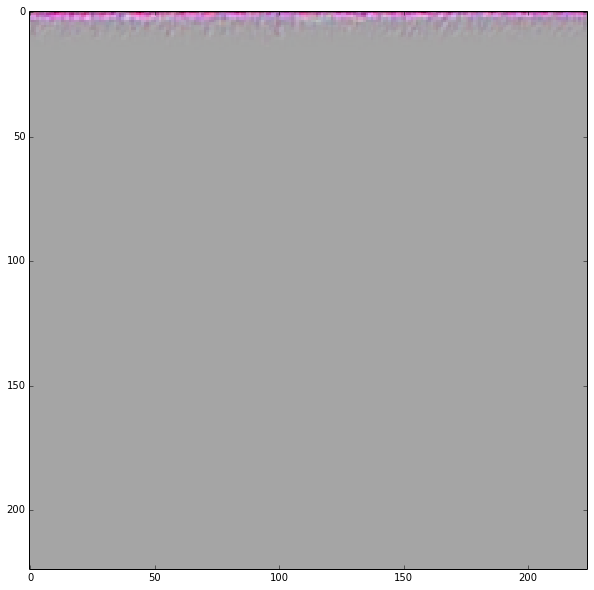

In [49]:
test = net.forward()

o = net.blobs['conv1_1t'].data[0]
o -= o.min()
o /= o.max()
o *= 255
o = np.rollaxis(o, 0, 3)
print o.shape
plt.imshow(o.astype(np.uint8))